In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [2]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [3]:
#creating stratified samples
import numpy as np
housing['income_cat']=pd.cut(housing['median_income'],bins=[0.,1.5,3.,4.5,6,np.inf], labels=[1,2,3,4,5])


In [6]:
housing['income_cat'].head()

0    5
1    5
2    5
3    4
4    3
Name: income_cat, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

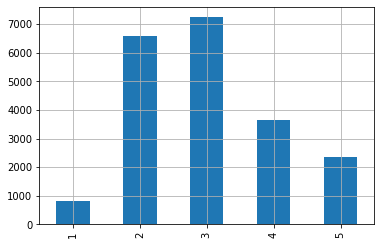

In [7]:
housing['income_cat'].value_counts().sort_index().plot.bar(grid=True)

In [8]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

  income_cat  
0          5  
1          5  
2          5  
3          4  
4          3

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.22     32.75                34.0       6001.0          1111.0   
8267     -117.03     32.69                10.0        901.0           163.0   
17445    -122.27     37.74                28.0       6909.0          1554.0   
14265    -121.82     37.25                25.0       4021.0           634.0   
2271     -115.98     33.32                 8.0        240.0            46.0   
...          ...       ...                 ...          ...             ...   
11284    -122.37     37.94                49.0        969.0           229.0   
11964    -118.38     33.89                35.0       1778.0           330.0   
5390     -119.33     36.28                16.0       2624.0           527.0   
860      -117.19     34.08                22.0       2467.0           555.0   
15795    -118.86     34.22                22.0       1230.0           200.0   

       population  households  median_income ocean_proximity income_cat  \
14196      2654.0      1072.0         4.5878      NEAR OCEAN          4   
8267        698.0       167.0         4.6648      NEAR OCEAN          4   
17445      2974.0      1484.0         3.6875        NEAR BAY          3   
14265      2178.0       650.0         5.1663       <1H OCEAN          4   
2271         63.0        24.0         1.4688          INLAND          1   
...           ...         ...            ...             ...        ...   
11284       599.0       195.0         1.3167        NEAR BAY          1   
11964       732.0       312.0         6.5745       <1H OCEAN          5   
5390       1077.0       520.0         2.1250          INLAND          2   
860        1567.0       494.0         2.6536          INLAND          2   
15795       673.0       195.0         6.2708       <1H OCEAN          5   

       rooms_per_house  bedrooms_ratio  people_per_house  
14196         5.597948        0.185136          2.475746  
8267          5.395210        0.180910          4.179641  
17445         4.655660        0.224924          2.004043  
14265         6.186154        0.157672          3.350769  
2271         10.000000        0.191667          2.625000  
...                ...             ...               ...  
11284         4.969231        0.236326          3.071795  
11964         5.698718        0.185602          2.346154  
5390          5.046154        0.200838          2.071154  
860           4.993927        0.224970          3.172065  
15795         6.307692        0.162602          3.451282  

[16512 rows x 13 columns]

In [4]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [5]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\dell\AppData\Local\Temp\ipykernel_4804\826279322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

In [13]:
housing.head(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   

   population  households  median_income ocean_proximity income_cat  \
0       322.0       126.0         8.3252        NEAR BAY          5   
1      2401.0      1138.0         8.3014        NEAR BAY          5   
2       496.0       177.0         7.2574        NEAR BAY          5   

   rooms_per_house  bedrooms_ratio  people_per_house  
0         6.984127        0.146591          2.555556  
1         6.238137        0.155797          2.109842  
2         8.288136        0.129516          2.802260

In [6]:
housing_labels = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)


In [22]:
housing.head(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   

   population  households  median_income ocean_proximity  rooms_per_house  \
0       322.0       126.0         8.3252        NEAR BAY         6.984127   
1      2401.0      1138.0         8.3014        NEAR BAY         6.238137   
2       496.0       177.0         7.2574        NEAR BAY         8.288136   

   bedrooms_ratio  people_per_house  
0        0.146591          2.555556  
1        0.155797          2.109842  
2        0.129516          2.802260

In [7]:
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

In [8]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms          0
population              0
households              0
median_income           0
ocean_proximity         0
income_cat              0
rooms_per_house         0
bedrooms_ratio        207
people_per_house        0
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing['bedrooms_ratio'].values.reshape(-1,1))



SimpleImputer(strategy='median')

In [10]:
housing['bedrooms_ratio'].values.reshape(-1,1)

array([[0.14659091],
       [0.15579659],
       [0.12951602],
       ...,
       [0.21517303],
       [0.21989247],
       [0.22118492]])

In [11]:
X= imputer.transform(housing['bedrooms_ratio'].values.reshape(-1,1))
np.any(np.isnan(X))

False

In [40]:
X.flatten()

array([0.14659091, 0.15579659, 0.12951602, ..., 0.21517303, 0.21989247,
       0.22118492])

In [12]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms          0
population              0
households              0
median_income           0
ocean_proximity         0
income_cat              0
rooms_per_house         0
bedrooms_ratio        207
people_per_house        0
dtype: int64

In [13]:
X=pd.Series(X.flatten())
X

0        0.146591
1        0.155797
2        0.129516
3        0.184458
4        0.172096
           ...   
20635    0.224625
20636    0.215208
20637    0.215173
20638    0.219892
20639    0.221185
Length: 20640, dtype: float64

In [14]:
housing['bedrooms_ratio']= X
housing.head(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   

   population  households  median_income ocean_proximity income_cat  \
0       322.0       126.0         8.3252        NEAR BAY          5   
1      2401.0      1138.0         8.3014        NEAR BAY          5   
2       496.0       177.0         7.2574        NEAR BAY          5   

   rooms_per_house  bedrooms_ratio  people_per_house  
0         6.984127        0.146591          2.555556  
1         6.238137        0.155797          2.109842  
2         8.288136        0.129516          2.802260

In [15]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
income_cat            0
rooms_per_house       0
bedrooms_ratio        0
people_per_house      0
dtype: int64

In [45]:
#dropping outliers
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest()
out_predictions= isolation_forest.fit_predict(housing.select_dtypes(include=np.number))
out_predictions

array([ 1, -1,  1, ...,  1,  1,  1])

In [46]:
#to remove the outliers you should run the below code
# housing = housing.iloc[out_predictions==1]
# housing_labels = housing_labels.iloc[out_predictions==1]

In [47]:
#handling Categorical Columns:
#we have options like: OrdinalEncoder, OneHotEncoder, for NNs we can do Embedding

In [50]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing['ocean_proximity'].values.reshape(-1,1))
housing_cat_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [16]:
#better alternative is one-hot encoder
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat = housing['ocean_proximity'].values.reshape(-1,1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [52]:
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [53]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [59]:
cat_encoder.get_feature_names_out()

array(['x0_<1H OCEAN', 'x0_INLAND', 'x0_ISLAND', 'x0_NEAR BAY',
       'x0_NEAR OCEAN'], dtype=object)

In [61]:
#if we transform the target column using Standard/MinMaxScaler we must inverse transform the predictions
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [62]:
predictions

array([[393027.73007889],
       [392033.03646789],
       [348400.25790111],
       [280932.44713449],
       [205833.0795036 ]])

In [19]:
#but a better alternative is to use TransformedTargetRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
#we pass the model along with label transformer to TransformedTargetRegressor
model = TransformedTargetRegressor(LinearRegression(),transformer=StandardScaler())
model.fit(housing[['median_income']],housing_labels)
predictions = model.predict(housing[['median_income']].iloc[:5])
predictions

array([393027.73007889, 392033.03646789, 348400.25790111, 280932.44713449,
       205833.0795036 ])

In [20]:
#you can make your own custom transformer using FunctionTransformer
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(func=np.log, inverse_func=np.exp)

In [21]:
#to add learning/fitting capability to the transformers, we need to create our own class
#creating a standardscaler clone
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
class StandardScalerClone(BaseEstimator,TransformerMixin):
    def __init__(self, with_mean=True): #no kwargs, no args
        self.with_mean = with_mean

    def fit(self, X, y=None):
        X = check_array(X)
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_= X.shape[1]
        return self

    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [22]:
# Transformation Pipelines
from sklearn.pipeline import Pipeline
my_pipeline = Pipeline([('impute', SimpleImputer(strategy='median')),('standardize', StandardScaler())])

In [23]:
#or you could use the make_pipeline() imported from sklearn.pipeline

In [24]:
import sklearn
help(sklearn.set_config)

Help on function set_config in module sklearn._config:

set_config(assume_finite=None, working_memory=None, print_changed_only=None, display=None, pairwise_dist_chunk_size=None, enable_cython_pairwise_dist=None, array_api_dispatch=None, transform_output=None)
    Set global scikit-learn configuration
    
    .. versionadded:: 0.19
    
    Parameters
    ----------
    assume_finite : bool, default=None
        If True, validation for finiteness will be skipped,
        saving time, but leading to potential crashes. If
        False, validation for finiteness will be performed,
        avoiding error.  Global default: False.
    
        .. versionadded:: 0.19
    
    working_memory : int, default=None
        If set, scikit-learn will attempt to limit the size of temporary arrays
        to this number of MiB (per job when parallelised), often saving both
        computation time and memory on expensive operations that can be
        performed in chunks. Global default: 1024.
    
 

In [25]:
my_pipeline.set_params(impute__strategy='median')

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [26]:
#Column Transformer you can apply different pipeline transformations to different columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]
cat_pipeline = Pipeline([('impute', SimpleImputer(strategy='most_frequent')),('one-hot-encode', OneHotEncoder(handle_unknown='ignore'))])
cont_pipeline = Pipeline([('impute', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

preprocessing = ColumnTransformer([('cont_pipeline', cont_pipeline, num_attribs), ('cat_pipeline', cat_pipeline, cat_attribs)])

In [ ]:
#or you could use make_column_selector, make_column_transformer
from sklearn.compose import make_column_selector, make_column_transformer
preprocessing = make_column_transformer([(cont_pipeline, make_column_selector(dtype_include=np.number)),
(cat_pipeline, make_column_selector(dtype_include=object))])

In [27]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [33]:
#model 
from sklearn.linear_model import LinearRegression


lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BD08A22890>)])),
                ('linearregression', LinearRegression())])

In [34]:
housing_pred = lin_reg.predict(housing)
housing_pred[:5].round(-2)

array([374900., 379400., 376900., 319200., 285400.])

In [35]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(housing_labels, housing_pred, squared=False))

67646.96143652729


In [36]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BD08A22890>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [37]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
tree_rmse

0.0

In [40]:
#how could the MSE be 0
# better validation are performed using cross_validation_score
from sklearn.model_selection import cross_val_score
tree_rems= -cross_val_score(tree_reg, housing, housing_labels,scoring='neg_root_mean_squared_error', cv=10)
pd.Series(tree_rems).describe()

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

count       10.000000
mean     65300.135042
std       1822.666743
min      62224.117186
25%      64094.840197
50%      65077.212259
75%      66320.969680
max      68374.058150
dtype: float64

In [39]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [41]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

In [42]:
#improving model parameters:
# GridSearchCV
full_pipeline = Pipeline([('preprocessing',preprocessing),('random_forest', RandomForestRegressor())])
param_grid = [
    {
        'preprocessing__geo__n_clusters':[5,8,10],
        'random_forest__max_features':[4,6,8],
    },
    {
        'preprocessing__geo__n_clusters':[10, 15],
        'random_forest__max_features':[6,8,10]
    }
]
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

#best hyperparameters combination found --> grid_search.best_params_ , grid_search.best_estimator_

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001BD08A22890>)])),
                                       ('random_forest',
                                        RandomForestRegressor())]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [ ]:
#another alternative of GridSearchCV is RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from numpy.random import randint

param_dist = [{
    'preprocessing__geo__n_clusters': randint(low=3, high=50),
    'random_forest__n_features':randint(low=2, high=20)
}]
rnd_srch = RandomizedSearchCV(estimator=full_pipeline, param_distributions=param_dist,n_iter=10, cv=3, scoring='neg_root_mean_squared_error')

In [43]:
final_model = grid_search.best_estimator_
final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000001B...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BD14F00D00>)])),
                ('random_forest', RandomForestRegressor(max_features=6))])

In [44]:
final_model['random_forest'].feature_importances_

array([0.03601524, 0.03053863, 0.04924246, 0.0090199 , 0.00957329,
       0.00927016, 0.00881678, 0.17826029, 0.03146364, 0.01504901,
       0.02077641, 0.02101443, 0.01759408, 0.01782142, 0.01915819,
       0.0190435 , 0.00748593, 0.03822152, 0.02143621, 0.02293255,
       0.01306684, 0.00945422, 0.01709072, 0.00815769, 0.10549269,
       0.00021851, 0.00154609, 0.00402839, 0.02164071, 0.11405918,
       0.02405458, 0.05206203, 0.0463947 ])

In [45]:
final_predictions = final_model.predict(housing[15:35])

In [46]:
final_rmse = mean_squared_error(housing_labels[15:35], final_predictions, squared=False)
print(final_rmse)

10039.303890210715


In [47]:
#95% confidence interval
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - housing_labels[15:35]) ** 2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1, loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([ 6341.82441729, 12702.61816557])

In [ ]:
#exercise: use SVR model
from sklearn.svm import SVR
svr_pipeline = Pipeline([('preprocessing',preprocessing),('svr', SVR())])
param_grid = [
    {'svr__kernel': ['linear'], 'svr__C': [10., 30., 100., 300., 1000.,
                                               3000., 10000., 30000.0]},
        {'svr__kernel': ['rbf'], 'svr__C': [1.0, 3.0, 10., 30., 100., 300.,
                                            1000.0],
         'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
]
grid_search = GridSearchCV(svr_pipeline, param_grid,cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(housing[:5000], housing_labels[:5000])

In [1]:
#to check best param and score of gridsearchcv
#   grid_search.best_score_
#   grid_search.best_param_


In [ ]:
#question:2 use randomsearchcv
from sklearn.model_selection import RandomizedSearchCV

svr_pipeline = Pipeline([('preprocessing',preprocessing),('svr', SVR())])
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'svr__kernel': ['linear', 'rbf'],
        'svr__C': reciprocal(20, 200_000),
        'svr__gamma': expon(scale=1.0),
    }
random_search_cv = RandomizedSearchCV(svr_pipeline,param_distributions=param_distribs,n_iter=50, cv=3,
                                scoring='neg_root_mean_squared_error')
random_search_cv.fit(housing[:5000], housing_labels[:5000])

In [ ]:
# try using SelectFromModel transformer to select only important attributes of the model while traning it
from sklearn.feature_selection import SelectFromModel
selector_pipeline = Pipeline([('preprocessing', preprocessing),
                              ('svr', SelectFromModel(
                                  RandomForestRegressor(), threshold=0.005)),
                              ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                                          gamma=rnd_search.best_params_[
                                              "svr__gamma"],
                                          kernel=rnd_search.best_params_["svr__kernel"])),
                              ])


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import clone, MetaEstimatorMixin


class FeatureFromRegressor(MetaEstimatorMixin, BaseEstimator, TransformerMixin):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y=None):
        estimator_ = clone(self.estimator)
        estimator_.fit(X, y)
        self.estimator_ = estimator_
        self.n_features_in_ = self.estimator_.n_features_in_
        if hasattr(self.estimator, "feature_names_in_"):
            self.feature_names_in_ = self.estimator.feature_names_in_
        return self

    def transform(self, X):
        check_is_fitted(self)
        predictions = self.estimator_.predict(X)
        if predictions.ndim == 1:
            predictions = predictions.reshape(-1, 1)
        return predictions

    def get_feature_names_out(self,names=None):
        check_is_fitted(self)
        n_outputs = getattr(self.estimator_,'n_outputs_',1)
        estimator_class_name = self.estimator_.__class__.__name__
        estimator_short_name = estimator_class_name.lower().replace("_", "")
        return [f"{estimator_short_name}_prediction_{i}"
                for i in range(n_outputs)]

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=3,weights='distance')
knn_transformer = FeatureFromRegressor(knn_reg)
knn_transformer.fit_transform(housing[['longitude','latitude']], housing_labels)